# Analyzing data science articles 

The data for this notebook can be found [here](https://www.kaggle.com/viniciuslambert/medium-data-science-articles-dataset).

And it extraction method can be found [Here] (https://github.com/viniciusLambert/medium-scraping/blob/main/scrap.ipynb).

## Fluxos

- [ ] gather
- [ ] assess
- [ ] clean
- [ ] analyze
- [ ] model
- [ ] visualize

## TODO


- [X] What words combinations get the most Engagement?
- [X] What words combinations get less engagement?
- [X] What words combinations get more engagement in the start of headline?
- [X] What words combinations get more engagement in the end of headline?
- [ ] What is the 'magical' number that get most engament?
- [ ] What is the better day to post?

In [2]:
import numpy as np
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-2021.csv')


df.shape
#df.head()

(47663, 11)

# Preparing data

## Find url duplicateds values and drop it

In [3]:
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df[df.url.duplicated(keep=False)]

 We have 1 duplicated values in url colum


,Unnamed: 0,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
24529,27554,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,"<strong class=""markup--strong markup--h3-strong""><em class=""markup--em markup--h3-em"">I’m a Data Scientist — Here’s why I work at Facebook</em></strong>",veronikabelokhvostova,https://medium.com/@veronikabelokhvostova,NaN,591.0,0,7,Data Science,2021-10-07
25596,28976,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,Facebook destroyed my family andmy mother and grandfather.,lexahe3185,https://medium.com/@lexahe3185,NaN,0.0,0,0,Data Science,2021-10-12


In [4]:
# I analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(f' We have {df.url.duplicated().sum()} duplicated values in url column')
df.shape

 We have 0 duplicated values in url column


(47662, 11)

## Modeling Data

### Data understanding

In [5]:
df.title[:10]

0                                                           Data Analytics and AI/ML platform for eCommerce
1               The journey from an Apple Silicon M1 powered laptop to an AMD Ryzen Threadripper 3 desktop.
2                                                                            Demystifying KPIs in Analytics
3    Большая разница: чем структурированная потоковая передача в Apache Spark отличается от Spark Streaming
4                                                                                    IoT: A New Way of Life
5         <strong class="markup--strong markup--h3-strong">CyerberVein Content Contributor Program</strong>
6                                                                 Analyzing my LinkedIn Network with Python
7         #EPL | Cantidad y calidad de tiros a puerta realizados y recibidos por equipos de #PremierLeague.
8                                               A gentle overview of the Deep Learning and Machine Learning
9                           

### Cleaning the data

As you can see, it has some confusing character, so we need to normalize the data.

In [8]:
def normalize_title(title):
    title = unicodedata.normalize("NFKD", title) # normalize data
    title = re.sub('<[^>]+>', '', title) # remove anything beteween <> (html noise)
    title = title.lower()
    title = re.sub("\d", 'X', title) # replace numbers by X
    
    return title 
    
df.title = df.title.apply(normalize_title)
df.title[:10]

0                                                           data analytics and ai/ml platform for ecommerce
1               the journey from an apple silicon mx powered laptop to an amd ryzen threadripper x desktop.
2                                                                            demystifying kpis in analytics
3    большая разница: чем структурированная потоковая передача в apache spark отличается от spark streaming
4                                                                                    iot: a new way of life
5                                                                   cyerbervein content contributor program
6                                                                 analyzing my linkedin network with python
7         #epl | cantidad y calidad de tiros a puerta realizados y recibidos por equipos de #premierleague.
8                                               a gentle overview of the deep learning and machine learning
9                           

## Get data insights
### Extracting word combinations data from headline

In [6]:
dict_word_combinations = {}

for title, claps, responses in zip(df.title, df.claps, df.responses):
    splited_title = title.split(' ')
    if len(splited_title) > 2:
        for i in range((len(splited_title) - 2)):
            word_combination = f'{splited_title[i]} {splited_title[i+1]} {splited_title[i+2]}' 
            if word_combination in dict_word_combinations.keys():
                dict_word_combinations[word_combination]['frequency'] += 1
                dict_word_combinations[word_combination]['total_claps'] += claps
                dict_word_combinations[word_combination]['total_responses'] += responses
            else:
                dict_word_combinations[word_combination] = {'word_combination': word_combination,
                                                            'frequency' : 1, 
                                                            'total_claps': claps,
                                                            'total_responses': responses,
                                                            'first_words': 0,
                                                            'first_words_total_claps' : 0,
                                                            'last_words': 0,
                                                            'last_words_total_claps' : 0,
                                                           }
                                                            
            if i == 0:
                dict_word_combinations[word_combination]['first_words'] += 1
                dict_word_combinations[word_combination]['first_words_total_claps'] += claps
            if i == len(splited_title) - 3:
                dict_word_combinations[word_combination]['last_words'] += 1
                dict_word_combinations[word_combination]['last_words_total_claps'] += claps

In [7]:
df_word_combination = pd.DataFrame([dict_word_combinations[x] for x in dict_word_combinations.keys()])
df_word_combination

,word_combination,frequency,total_claps,total_responses,first_words,first_words_total_claps,last_words,last_words_total_claps
0,data analytics and,20,260.0,00000000000000000000,8,39.0,0,0.0
1,analytics and ai/ml,1,30.0,0,0,0.0,0,0.0
2,and ai/ml platform,1,30.0,0,0,0.0,0,0.0
3,ai/ml platform for,1,30.0,0,0,0.0,0,0.0
4,platform for ecommerce,1,30.0,0,0,0.0,1,30.0
...,...,...,...,...,...,...,...,...
209649,including product flavor,1,137.0,0,0,0.0,1,137.0
209650,navigate speedy success,1,0.0,0,1,0.0,0,0.0
209651,speedy success of,1,0.0,0,0,0.0,0,0.0
209652,success of cyclistic,1,0.0,0,0,0.0,0,0.0


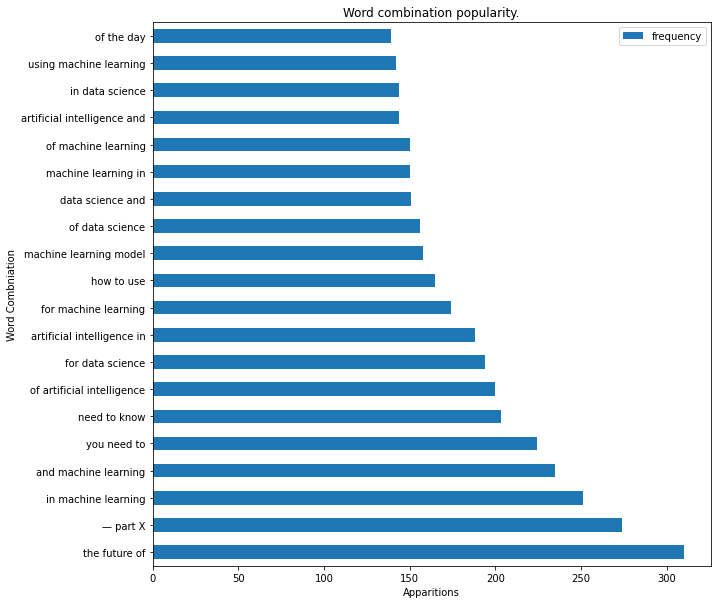

In [8]:
df_word_combination.sort_values('frequency',ascending=False)[:20].plot.barh(x='word_combination', y='frequency')
plt.title('Word combination popularity.')
plt.xlabel('Apparitions')
plt.ylabel('Word Combniation')
plt.show()

### What headline set of words atract more claps?

In [9]:
#list_word_combination

In [10]:
#Extract mena values for claps and trashold for freqency to remove outliers

X = 50
df_word_combination['claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.total_claps / row.frequency 
                                                              if row.frequency >= X 
                                                              else None , axis=1)

Y = 25
df_word_combination['last_words_claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.last_words_total_claps / row.last_words 
                                                              if row.last_words >= Y
                                                              else None , axis=1)

Z = 25
df_word_combination['first_words_claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.first_words_total_claps / row.first_words 
                                                              if row.first_words >= Z
                                                              else None , axis=1)

df_word_combination.head()

,word_combination,frequency,total_claps,total_responses,first_words,first_words_total_claps,last_words,last_words_total_claps,claps_mean,last_words_claps_mean,first_words_claps_mean
0,data analytics and,20,260.0,00000000000000000000,8,39.0,0,0.0,NaN,NaN,NaN
1,analytics and ai/ml,1,30.0,0,0,0.0,0,0.0,NaN,NaN,NaN
2,and ai/ml platform,1,30.0,0,0,0.0,0,0.0,NaN,NaN,NaN
3,ai/ml platform for,1,30.0,0,0,0.0,0,0.0,NaN,NaN,NaN
4,platform for ecommerce,1,30.0,0,0,0.0,1,30.0,NaN,NaN,NaN


In [11]:
print(f' There are {df_word_combination.claps_mean.notna().sum()} set of words that appear more than {X} times')
print(f' There are {df_word_combination.last_words_claps_mean.notna().sum()} set of words as last words that appear more than {Y} times')
print(f' There are {df_word_combination.first_words_claps_mean.notna().sum()} set of words as first words that appear more than {Z} times')

 There are 134 set of words that appear more than 50 times
 There are 43 set of words as last words that appear more than 25 times
 There are 69 set of words as first words that appear more than 25 times


## Analysing Best words combinations

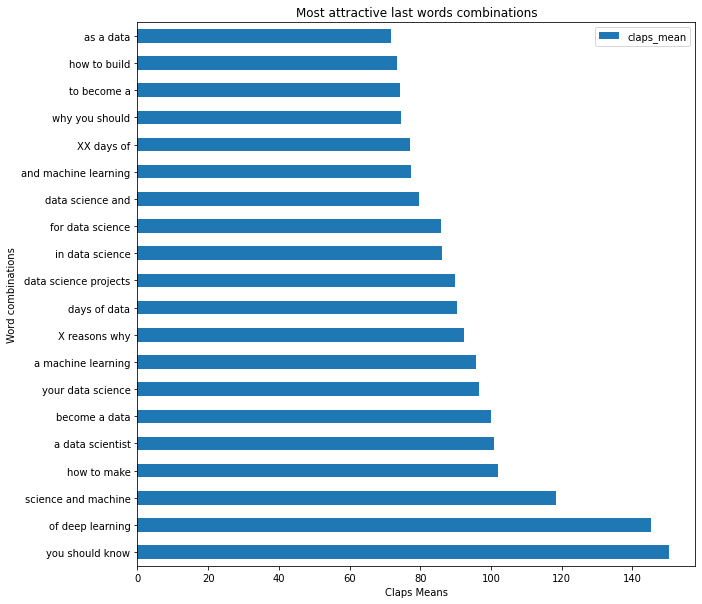

In [12]:
df_word_combination.sort_values('claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='claps_mean')
plt.title('Most attractive last words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

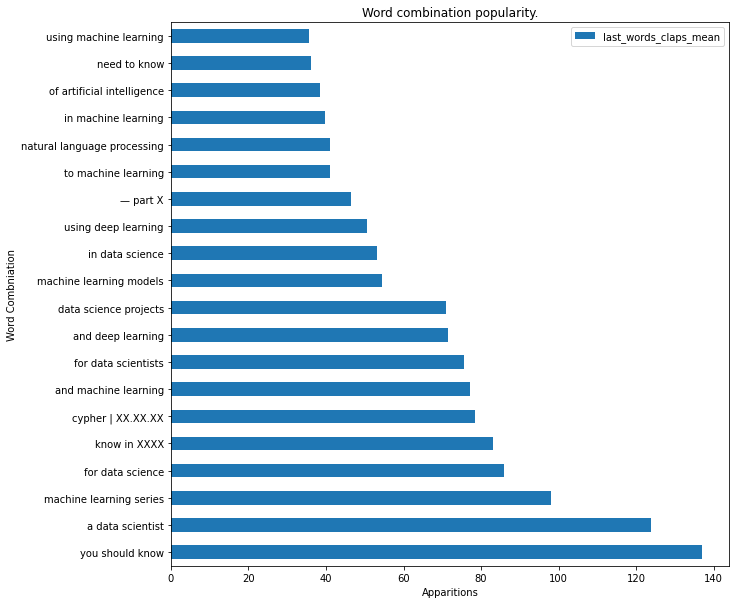

In [13]:
df_word_combination.sort_values('last_words_claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='last_words_claps_mean')
plt.title('Word combination popularity.')
plt.xlabel('Apparitions')
plt.ylabel('Word Combniation')
plt.show()

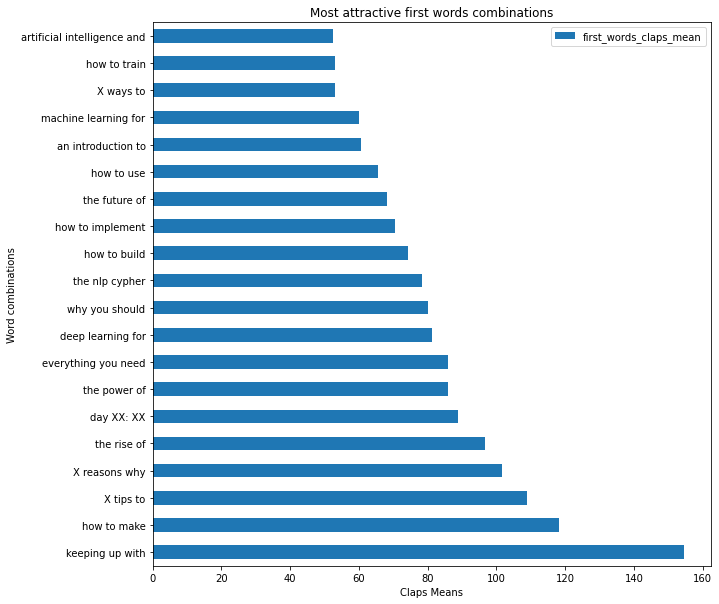

In [14]:
df_word_combination.sort_values('first_words_claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='first_words_claps_mean')
plt.title('Most attractive first words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

## Analysing Worses words combinations

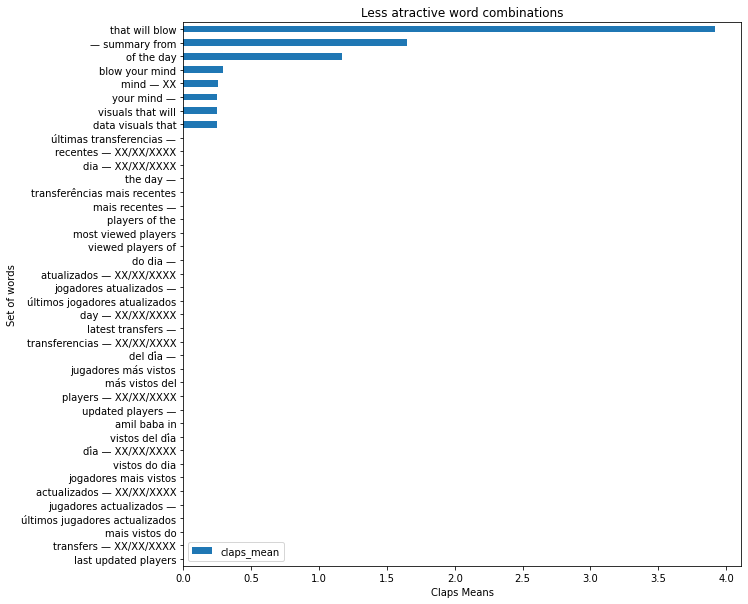

In [15]:
df_word_combination.sort_values('claps_mean',ascending=True)[:40].plot.barh(x='word_combination', y='claps_mean')

plt.title('Less atractive word combinations')
plt.xlabel('Claps Means')
plt.ylabel('Set of words')
plt.show()

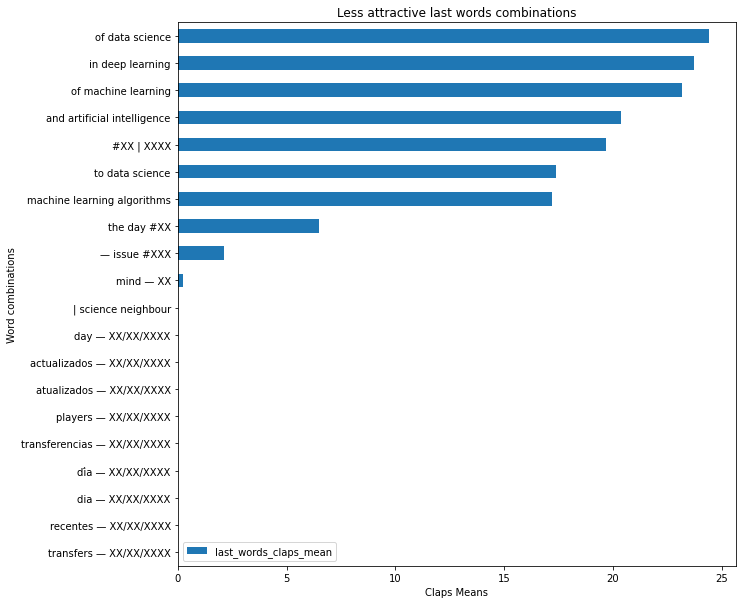

In [16]:
df_word_combination.sort_values('last_words_claps_mean',ascending=True)[:20].plot.barh(x='word_combination', y='last_words_claps_mean')
plt.title('Less attractive last words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

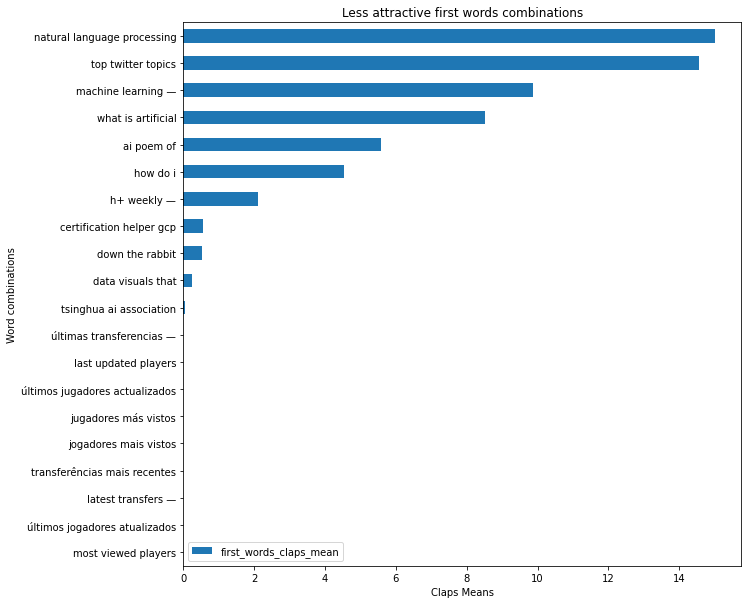

In [17]:
df_word_combination.sort_values('first_words_claps_mean',ascending=True)[:20].plot.barh(x='word_combination', y='first_words_claps_mean')
plt.title('Less attractive first words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()